## ABSTRACT: ##

## This event log was extracted from data gathered from the audit system of an instance of the ServiceNow platform used by an IT company and enriched with data loaded from a relational database ###

## Importing Libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("incident_event_log.csv")
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


* **We are replacing all the ? present in the data with np.nan, as the ? represent NULL values**

In [3]:
data.replace({'?':np.nan},inplace = True)

In [4]:
data.isnull().sum().sort_values(ascending = False)

caused_by                  141689
vendor                     141468
cmdb_ci                    141267
rfc                        140721
problem_id                 139417
sys_created_at              53076
sys_created_by              53076
u_symptom                   32964
assigned_to                 27496
assignment_group            14213
opened_by                    4835
resolved_at                  3141
closed_code                   714
resolved_by                   226
subcategory                   111
category                       78
location                       76
caller_id                      29
reassignment_count              0
active                          0
incident_state                  0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
opened_at                       0
closed_at                       0
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
impact        

## Attributes information:

* We have 29 featues which are of Object data type which will be converted into categorical features during the modelling process
* We have 3 integer data type features
* We have 4 boolean data type features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [6]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [7]:
data.shape

(141712, 36)

## Problem Statement

* Our data set consists of 1.4L data points with 34 features + 2 features(dependent variables)**
* The features which we are considering as dependent variables are(according to the source) :**
    * **Resolved_at**
    * **closed_at**
* With respect to the dependent variables , we can consider doing of machine learning problems, such as regression classification and cluster analysis. 
    * **How Regression?**
        * We will consider the time difference between the sys_created_at and resolved_at features, in this case we can understand how much time will the new raised ticket will take to resolve.
    * **How Classification?**
        * We can consider the closed_code as our dependent variable , and predict the closed code for the ticket raised.
    * **How Cluster Analysis?**
        * We can understand which tickets can be considered as a similar cluster and work on why those tickets were considered as similar that would be helpful in making the client experience better.

## Data Cleaning Process:

* **First we will look at the features which have null values in the below heat map:**
    * We have null values in both the sys_created_at and the sys_created_by feature, and also the missing values are parallel, which means the same data point which has missing sys_created_by feature also have sys_created_at as missing. although the sys_created_at is a data and time column may be we can ask the client regarding why this feature is missing, as imputation of this process would lead to more noise in the data.
    * For the sys_created_by feature, we will find out the patterns among the features so that every feature can be imputed accordingly
    * u_symptom is a feed back feature from the client who raised the ticket, the null values in this feature can be considered in two ways, one of them is the client didnt give any feedback so that value is kept null, so we can impute the value as 'N/A' during the imputation process , the other way is, after talking with the client , may be we can find out if they have any default value for no feedback and impute those.
    * We have two features which are assignment_group and assigned_to , we will find out the patterns between these features and impute accordingly.
    * **We have features such as cmdb_ci,problem_id,rfc,vendor,caused_by as we can see that almost more than 95% of the data is NULL , so in this case unless we have some information from the client ,we will drop all these features.**
    

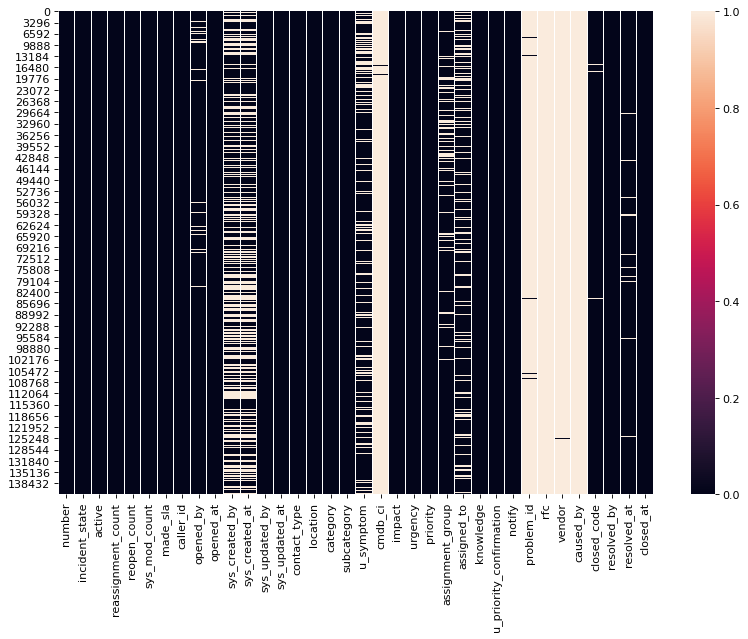

In [8]:
plt.figure(num = None, figsize = (12,8),dpi = 80,facecolor = 'w',edgecolor ='k')
sns.heatmap(data.isnull())
plt.show()

* **We are removing all the extra key words present infront of the value, as it will easier to do the EDA process.**

In [9]:
data['location'] = data['location'].str.split(expand = True)[1]

data['subcategory'] = data['subcategory'].str.split(expand = True)[1]

data['category'] = data['category'].str.split(expand = True)[1]

data['u_symptom'] = data['u_symptom'].str.split(expand = True)[1]

data['impact'] = data['impact'].str.split(expand = True)[2]

data['priority'] = data['priority'].str.split(expand = True)[2]

data['urgency'] = data['urgency'].str.split(expand = True)[2]

data['sys_created_by'] = data['sys_created_by'].str.split(expand = True)[2]

data['opened_by'] = data['opened_by'].str.split(expand = True)[2]

data['sys_updated_by'] = data['sys_updated_by'].str.split(expand = True)[2]

data['resolved_by'] = data['resolved_by'].str.split(expand = True)[2]

data['assignment_group'] = data['assignment_group'].str.split(expand = True)[1]

data['assigned_to'] = data['assigned_to'].str.split(expand = True)[1]

* **Converting all the date and time columns to datetime data type**

In [10]:
data['opened_at'] = pd.to_datetime(data['opened_at'],dayfirst = True)

data['sys_created_at'] = pd.to_datetime(data['sys_created_at'],dayfirst = True)

data['resolved_at'] = pd.to_datetime(data['resolved_at'],dayfirst = True)

data['closed_at'] = pd.to_datetime(data['closed_at'],dayfirst = True)

data['sys_updated_at'] = pd.to_datetime(data['sys_updated_at'],dayfirst = True)

In [11]:
#set(zip(data['opened_by'],data['sys_created_by']))

* **If we look at the above SET , let's take the first two pair's which are 10-14 and 10-NaN, so in the first case, whenever the case is opened_by 10 it is created_by 14, in the next case as we do not have the value for the opend_by = 10 data point, we will impute 14 in this place looking at the values above as there are no other pair's available, and we will impute the complete feature using this pattern, but there are also some cases where one opened_by value has more than one sys_created_by value, so in this case we will take the mode of the sys_created_by and impute them**

* **We will also use the same pattern for the opposite, i.e; we will use sys_created_by to find the opend_by feature.**

In [12]:
set_opened_created = set(zip(data['opened_by'],data['sys_created_by']))
for opened,created in set_opened_created:
    if(isinstance(opened,str) and isinstance(created,str)):
        data['sys_created_by'] = np.where((data['opened_by'] == opened) 
                                          & (data['sys_created_by'].isnull()),
                                          created,data['sys_created_by'])

In [13]:
array_opened = data['sys_created_by'][data['opened_by'].isnull()].unique()
for i in array_opened:
    if isinstance(i,str):
        if (data['opened_by'][data['sys_created_by'] == i].isnull().value_counts(normalize = True).loc[True] == 1):
            print("There are no values for opened_by {}".format(i))
        else:
            print("The value for opened_by {} is :".format(i))
            print(data['opened_by'][data['sys_created_by'] == i].value_counts().iloc[0])

There are no values for opened_by 89
There are no values for opened_by 18


* **As there are no other patterns, for the remaining null values, we will impute them with the mode.**

In [14]:
mode_opened_by = data['opened_by'].mode()[0]
mode_sys_created_by = data['sys_created_by'].mode()[0]
data.fillna({'opened_by':mode_opened_by},inplace = True)
data.fillna({'sys_created_by':mode_sys_created_by},inplace = True)

* **LETS SEE IF WE CAN FIND THE SIMILAR PATTERN BETWEEN THE ASSIGNMENT_GROUP AND THE ASSIGNED_TO COLUMN.**

In [15]:
#(list(zip(data['assignment_group'],data['assigned_to'])))

In [16]:
#(list(zip(data['sys_created_by'],data['assigned_to'])))

In [17]:
#(set(zip(data['sys_created_by'],data['assignment_group'])))

In [18]:
data['assignment_group'][data['sys_created_by'] == '5'].value_counts()

65    213
56     18
53     11
25      6
51      4
70      2
39      1
76      1
Name: assignment_group, dtype: int64

In [19]:
data['assigned_to'][data['sys_created_by'] == '5'].value_counts()

7      157
2       29
167     18
197     12
121     10
210      9
17       9
4        7
57       4
41       1
Name: assigned_to, dtype: int64

In [20]:
data['assignment_group'][data['assigned_to'] == '7'].value_counts()

65    318
51     13
70      5
25      2
20      1
56      1
57      1
55      1
6       1
61      1
Name: assignment_group, dtype: int64

* **SO THE ABOVE RESULTS INDICATE THAT NO MATTER WHICH FEATURE WE CHOOSE TO IMPUTE THE ASSIGNMENT GROUP FEATURE, THE VALUE IS THE SAME, FOR EXAMPLE WE LOOK AT THE ASSIGNMENT GROUP AND SYS_CREATED_BY , THE VALUE 5 FOR SYS_CREATED_BY GAVE US 65 AS THE MODE (AS WE DONT SEE A TRUE PATTERN WE ARE IMPUTING WITH THE MODE , BUT IN A WAY WHERE WE CAN HAVE SOME CONFIDENCE THAT THIS VALUE CAN BE A POSSIBLE CHANCE FOR THE ASSIGNMENT GROUP) , NOW TO CROSS CHECK WE WILL FIND OUT WHAT IS THE MODE OF ASSINGED TO FEATURE WHICH HAS SYS CREATED BY FEATURE VALUE OF 5 WHICH IS 7, NOW WE WILL CHECK WHETHER VALUE OF ASSIGNMENT GROUP IS SAME OR NOT NO MATTER WHAT FEATURE WE USE FOR THE MODE IMPUTATION OF THE ASSIGNMENT GROUP FEATURE, WHICH YIELDED US THE SAME VALUE WHICH IS 65, SO WE WILL USE THE ASSIGNMENT GROUP AND THE ASSINGED TO FEATURES FOR FURTHUR IMPUTATION.**

* **USING THE SAME METHOD FOR THE ASSIGNED_TO COLUMN AS WELL.**
* **WE ARE ALSO USING THE SAME METHOD FOR IMPUTING THE RESOLVED_BY FEATURES AS WELL.**

In [21]:
my_list = list(set(zip(data['assignment_group'],data['assigned_to'])))
for package in my_list:
    if np.isnan(float(package[1])):
        assigned_to = list(data['assigned_to'][data['assignment_group'] == package[0]].value_counts().index)
        if(len(assigned_to) != 0):
            data['assigned_to'] = np.where((data['assignment_group'] == package[0]) & 
                                       (data['assigned_to'].isnull()),assigned_to[0],data['assigned_to'])
    elif np.isnan(float(package[0])):
        assignment_group = list(data['assignment_group'][data['assigned_to'] == package[1]].value_counts().index)
        if(len(assignment_group) != 0):
            data['assignment_group'] = np.where((data['assigned_to'] == package[1]) & 
                                        (data['assignment_group'].isnull()),assignment_group[0],data['assignment_group'])

            
# WE ARE FILLING ALL THE OTHER ROW'S WITH THE RESPECTIVE MODE'S OF THE FEATURES, WHICH HAVE BOTH THE FEATURES AS NULL.
            
AT_mode = data['assigned_to'].mode()
AG_mode = data['assignment_group'].mode()
data.fillna({'assigned_to':AT_mode[0],'assignment_group':AG_mode[0]},inplace = True)

In [22]:
list(data['assignment_group'][data['resolved_by'].isnull()].unique())

['70', '20', '9', '25', '64', '5', '33', '22', '65', '73', '24']

In [23]:
#list(zip(data['assignment_group'],data['assigned_to'],data['resolved_by']))

In [24]:
List_AG = list(data['assignment_group'][data['resolved_by'].isnull()].unique())
for AG in List_AG:
    RB = data['resolved_by'][data['assignment_group'] == AG].mode()[0]
    data['resolved_by'] = np.where((data['assignment_group'] == AG) & (data['resolved_by'].isnull()),RB,data['resolved_by'])

* **Now we will look at the features location , category and sub_category, these are in hierarchy, as in whenever an incident is raise at a location , it comes under one category and to simplify the process even furthur we have subcategory, so to impute the null values in all these features we will use all three features.**

* **These are the different permutations possible and we will impute the values accordingly for the location , category and the sub_category features.**

* **P - Present / Not Null**
* **NP - Not Present / Null**

| Location | category | sub_category |
|----------|----------|--------------|
| P        | NP       | NP            |
| NP       | P        | NP            |
| NP       | NP       | P            |
| P        | P        | NP            |
| P        | NP        | P            |
| NP        | P        | P            |
|NP        | NP        | NP            |
| P        | P        | P            |

In [25]:
loc_null = data[['location','category','subcategory']][(data['location'].isnull()) 
                                                 & (data['category'].notnull()) 
                                                 & (data['subcategory'].notnull())]

loc_null

,location,category,subcategory


* **There are no data points where the location is null and the category and the sub_category are not null.**

In [26]:
cat_null = data[['location','category','subcategory']][(data['location'].notnull()) 
                                                 & (data['category'].isnull()) 
                                                 & (data['subcategory'].notnull())]

cat_null

,location,category,subcategory


* **There are no data points where the category is null and the location and the sub_category are not null.**

In [27]:
sub_cat_null = data[['location','category','subcategory']][(data['location'].notnull()) 
                                                 & (data['category'].notnull()) 
                                                 & (data['subcategory'].isnull())]

sub_cat_null

,location,category,subcategory
84228,161,28,NaN


* **There is one data point where we have the location and the category but we do not have the sub_category , so first we will search for values where the location is 161 and the category is 28 and find if there are any values for sub_category and if we find one, we will impute that value.**

In [28]:
data['subcategory'][(data['location'] == '161') & (data['category'] == '28')].unique()

array(['174', nan], dtype=object)

In [29]:
data['subcategory'] = np.where((data['location'] == '161') & (data['category'] == '28'),'174',data['subcategory'])

In [30]:
loc_cat_null = data[['location','category','subcategory']][(data['location'].isnull()) 
                                                 & (data['category'].isnull()) 
                                                 & (data['subcategory'].notnull())]

loc_cat_null

,location,category,subcategory


* **There are no data points where the sub_category is null and the location and the category are not null.**

In [31]:
loc_sub_cat_null = data[['location','category','subcategory']][(data['location'].isnull()) 
                                                 & (data['category'].notnull()) 
                                                 & (data['subcategory'].isnull())]

loc_sub_cat_null

,location,category,subcategory
17069,NaN,41,NaN
18033,NaN,41,NaN
19884,NaN,41,NaN
19887,NaN,41,NaN
20115,NaN,41,NaN
20696,NaN,41,NaN
20940,NaN,41,NaN
20943,NaN,41,NaN
21319,NaN,41,NaN
22006,NaN,41,NaN


In [32]:
loc_sub_cat_null['category'].unique()

array(['41', '36', '35'], dtype=object)

* **So we find that there are 3 categories ['41', '36', '35'] where the location and the sub_category are not present, one way is to look at the indexes in the above data frame, as we can see that all are different, which means there are already some data points of the same 'number' all we have to do is find that data point using the index and impute their respective location and sub_category.**

In [33]:
for i in list(loc_sub_cat_null.index):
    number = data.iloc[i]['number']
    location = data['location'][data['number'] == number].mode()
    if len(location) != 0:
        data['location'] = np.where((data['number'] == number) & (data['location'].isnull()),location,data['location'])
    sub_cat_mode = data['subcategory'][data['number'] == number].mode()
    if len(sub_cat_mode) != 0:
        data['subcategory'] = np.where((data['number'] == number) & (data['subcategory'].isnull()),sub_cat_mode,data['subcategory'])

In [34]:
cat_sub_cat_null = data[['location','category','subcategory']][(data['location'].notnull()) 
                                                 & (data['category'].isnull()) 
                                                 & (data['subcategory'].isnull())]

cat_sub_cat_null

,location,category,subcategory
1079,204,NaN,NaN
1080,204,NaN,NaN
1081,204,NaN,NaN
1082,204,NaN,NaN
1083,204,NaN,NaN
1084,204,NaN,NaN
1085,204,NaN,NaN
1086,204,NaN,NaN
1087,204,NaN,NaN
1088,51,NaN,NaN


In [35]:
cat_sub_cat_null['location'].unique()

array(['204', '51', '125', '55', '50', '71', '206', '217', '173', '75'],
      dtype=object)

* **So even in this case we have the values of location ['204', '51', '125', '55', '50', '71', '206', '217', '173', '75'] where the category and the sub_category are null, again if we look at the indexes the values are different, which means we already have the values for that 'number' ,so we will implement the similar method as above.**

In [36]:
new_list_cat_sub_cat_null = []
for i in list(cat_sub_cat_null.index):
    number = data.iloc[i]['number']
    if number not in new_list_cat_sub_cat_null:
        new_list_cat_sub_cat_null.append(number)

In [37]:
for i in new_list_cat_sub_cat_null:
    sub_cat_mode = data['subcategory'][data['number'] == i].mode()
    if len(sub_cat_mode) != 0:
        data['subcategory'] = np.where((data['number'] == i) & (data['subcategory'].isnull()),sub_cat_mode,
                                      data['subcategory'])
    cat_mode = data['category'][data['number'] == i].mode()
    if len(cat_mode) != 0:
        data['category'] = np.where((data['number'] == i) & (data['category'].isnull()),cat_mode,
                                      data['category'])

* **There are some values where we do not find any value for each location, category and sub_category, so we will impute the mode of the respective feature.**

In [38]:
#FOR THE REMAINING!

cat_sub_cat_null = data[['location','category','subcategory']][(data['location'].notnull()) 
                                                 & (data['category'].isnull()) 
                                                 & (data['subcategory'].isnull())]


for i in cat_sub_cat_null['location']:
    cat = data['category'][data['location'] == i].mode()
    sub_cat = data['subcategory'][data['location'] == i].mode()
        
    data['category'] = np.where((data['location'] == i) & (data['category'].isnull()),cat,data['category'])
    data['subcategory'] = np.where((data['location'] == i) & (data['subcategory'].isnull()),sub_cat,data['subcategory'])

In [39]:
all_null = data[['location','category','subcategory']][(data['location'].isnull()) 
                                                 & (data['category'].isnull()) 
                                                 & (data['subcategory'].isnull())]

new_list_all_null = []
for i in list(all_null.index):
    number = data.iloc[i]['number']
    if number not in new_list_all_null:
        new_list_all_null.append(number)

* **THOUGH THERE ARE ALL NULL VALUES IN THE ABOVE DATA FRAME, THERE ARE SOME NULL FOR WHICH WE HAVE VALUE'S WHICH ARE ALREADY PRESENT IN THE DATA SET.**
* **PLEASE FIND AN EXAMPLE BELOW:**
    * IF YOU LOOK AT THE TIME DIFFERENCE BETWEEN THE DATA POINTS , ALMOST EVERY DATA POINT HAS A TIME DIFFERENCE OF LESS THAN 2 BETWEEN THE OPENED_AT AND THE RESOLVED_AT FEATURE, WHICH MEANS THESE FEATURES DONT NEED ANY HELP FOR THE HIERARCHY OF VENDOR WHICH MEANS THE PERSON WHO RECEIVED MUST HAVE RESOLVED THE ISSUE, BUT ON THE OTHER HAND IF YOU LOOK AT SOME OF THE VALUES SUCH AS DATA POINT 5492, THE TIME DIFFERENCE IS ALOT MORE THAN 2 , WHICH MEANS IT TOOK SOME TIME TO RESOLVE THE ISSUE, SO IF WE CROSS CHECK THE 'NUMBER' WE COULD FIND OUT THE LOCATION , CATEGORY AND SUB CATEGORY.

In [40]:
#data[['opened_at','resolved_at']][data['location'].isnull() &
   # data['category'].isnull() & 
  #  data['subcategory'].isnull()]

In [41]:
for i in new_list_all_null:
    loc_mode = data['location'][data['number'] == i].mode()
    if len(loc_mode) != 0:
        data['location'] = np.where((data['number'] == i) & (data['location'].isnull()),loc_mode,
                                      data['location'])
    sub_cat_mode = data['subcategory'][data['number'] == i].mode()
    if len(sub_cat_mode) != 0:
        data['subcategory'] = np.where((data['number'] == i) & (data['subcategory'].isnull()),sub_cat_mode,
                                      data['subcategory'])
    cat_mode = data['category'][data['number'] == i].mode()
    if len(cat_mode) != 0:
        data['category'] = np.where((data['number'] == i) & (data['category'].isnull()),cat_mode,
                                      data['category'])

* **FOR THE VALUES WHERE THE LOCATION CATEGORY AND THE SUB CATEGORY ARE NULL, WE ARE USING THE OPENED_BY COLUMN, AND IMPUTING THE THREE VALUES WITH MODE, WHERE THE OPENED_BY FEATURE HAS THAT VALUE.**

In [42]:
list_all__null = list(data['opened_by'][(data['location'].isnull())
                 & (data['category'].isnull())
                 & (data['subcategory'].isnull())].unique())

for i in list_all__null:
    location = data['location'][data['opened_by'] == i].mode()[0]
    category = data['category'][data['opened_by'] == i].mode()[0]
    sub_category = data['subcategory'][data['opened_by'] == i].mode()[0]
    data['location'] = np.where((data['opened_by'] == i) & (data['location'].isnull()),
                                location,data['location'])
    
    data['category'] = np.where((data['opened_by'] == i) & (data['category'].isnull()),
                                category,data['category'])
    
    data['subcategory'] = np.where((data['opened_by'] == i) & (data['subcategory'].isnull()),
                                   sub_category,data['subcategory'])
    

* **WE WILL IMPUTE THE SYS_CREATED_AT (DATE AND TIME) COLUMN, USING THE OPENED_AT COLUMN, BY NOW IT IS CLEAR THAT FIRST THE ISSUE IS CREATED AND THEN THE ISSUE IS OPENED BY THE VENDOR, SO IT IS OBVIOUS THAT THE TIME FOR SYS_CREATED_AT WOULD BE LESS THAN OPENED_AT , SO WE WILL TAKE ALL THE DIFFERENT VALUE'S OF THE DIFFERENCE BETWEEN THE SYS_CREATED_AT AND THE OPENED_AT FEATURES AND USE THAT FOR THE IMPUTATION PROCESS.**

In [43]:
time_data = data[['number','opened_at','sys_created_at','resolved_at','closed_at','sys_updated_at']]
time_CA_OA = time_data[['opened_at','sys_created_at']][time_data['sys_created_at'].notnull()]
time_data_CA_OA = set(zip((time_CA_OA['opened_at']) - (time_CA_OA['sys_created_at'])))

In [44]:
total = []
for time in time_data_CA_OA:
    total.append(time[0].seconds)

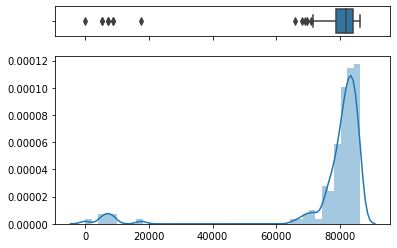

In [45]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(total, ax=ax_box)
sns.distplot(total, ax=ax_hist)

* **AS THERE ARE CASES FOR WHICH THE OPENED_AT AND THE SYS_CREATED_AT HAVE ALOT OF DIFFERENCE, THESE ARE THE EXTREME VALUES, WE WILL HAVE TO FIND OUT WHY IT TOOK A LOT OF TIME FOR THESE ISSUES, BUT THAT IS NOT THE CASE IN GENERAL SO WE WILL REMOVE THE EXTREME VALUES USING IQR METHOD AND SEE IF WE CAN FIND A NORMAL DISTRIBUTION FOR THE IMPUTATION PURPOSE.**

In [46]:
total = pd.Series(total)

q1_total = total.quantile(0.25)
q2_total = total.quantile()
q3_total = total.quantile(0.75)

iqr = q3_total- q1_total
ul = q3_total + 1.5*iqr
ll = q1_total - 1.5*iqr

total = total[(total > ll) & (total < ul)]

* **AS WE CAN SEE THAT THE DISTRIBUTION IS A LITTLE LEFT SKEWED , WE WILL USE THE MEDIAN AND ADD THIS TIME WITH THE OPENED_AT COLUMN AND IMPUTE THE NULL VALUES IN THE RESPECTIVE SYS_CREATED_AT COLUMN.**

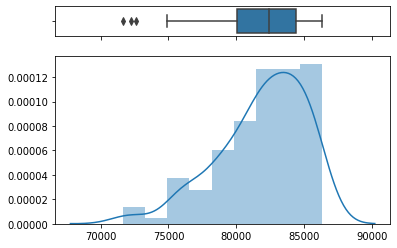

In [47]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(total, ax=ax_box)
sns.distplot(total, ax=ax_hist)

In [48]:
total_median = total.median()
data.fillna({'sys_created_at':data['opened_at']+datetime.timedelta(seconds = total_median)},inplace = True)

* **WE WILL USE THE SIMILAR METHOD FOR THE IMPUTATION OF THE RESOLVED_AT COLUMN, BUT FROM THE DISTRIBUTION PLOT BELOW WE COULD SEE THAT THERE ARE TWO DIFFERENT DISTRIBUION'S.**

In [49]:
time_CA_RA = time_data[['closed_at','resolved_at']][time_data['resolved_at'].notnull()]
time_data_CA_RA = set(zip((time_CA_RA['closed_at'] - time_CA_RA['resolved_at'])))

In [50]:
total_2 = []
for time in time_data_CA_RA:
    total_2.append(time[0].seconds)

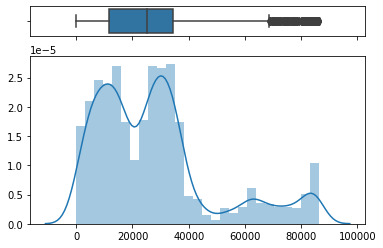

In [51]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(total_2, ax=ax_box)
sns.distplot(total_2, ax=ax_hist)

In [52]:
time_OA_RA = time_data[['opened_at','resolved_at']][time_data['resolved_at'].notnull()]
time_data_OA_RA = set(zip((time_OA_RA['resolved_at'] - time_OA_RA['opened_at'])))

total_3 = []
for time in time_data_OA_RA:
    total_3.append(time[0].seconds)


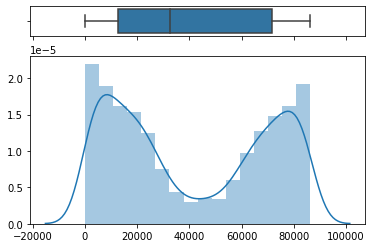

In [53]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(total_3, ax=ax_box)
sns.distplot(total_3, ax=ax_hist)

* **IN THE BELOW VALUE COUNTS FOR THE VENDOR COLUMN, IN GENERAL WE WOULD BE HAVING 3 TYPES OF VENDOR, AND VENDOR-3 IS THE LAST GUY IN THE HIERARCHY, WHERE IN IF THE VENDOR- 1 AND VENDOR -2 COULDN'T FINSIH OR HELP RESOLVE THE ISSUE, IT GOES TO THE VENDOR-3 , LIKE WISE FOR VENDOR -2 IF VENDOR-1 COULDN'T SOLVE THE ISSUE, IN THESE CASES, WE HAVE TO SPEAK WITH THE CLIENT FOR INFORMATION, WE JUST CANT IMPUTE THE VALUES WITH MODE.**

In [54]:
data['vendor'].value_counts()

code 8s     167
Vendor 1     69
Vendor 3      6
Vendor 2      2
Name: vendor, dtype: int64

* **IN THIS CASE THE RFC AND THE CAUSED_BY COLUMS ARE INTER RELATED, AS THE CAUSED_BY IS A IDENTIFIER OF THE RFC RESPONSIBLE BY THE INCIDENT.**

* **THE PROBLEM_ID JUST LIKE ANY OTHER IDENTIFIER WE HAVE SUCH AS THE NUMBER OR THE CALLER_ID, SO IT ACTUALLY DOESNT MATTER MUCH TO THE MACHINE LEARNING PROBLEM.**

* **THE CMDB_CI COLUMN IS THE CONFIRMATION IDENTIFIER USED TO REPORT THE INCIDENT, AS IN THE DATA DESCRIPTION IT SAYS THAT IT IS NOT NECESSARILY MANDATORY, WE CAN DISCARD THAT FOR OUR MACHINE LEARNING PROBLEM.**

In [55]:
data.drop(['caller_id','rfc','vendor','caused_by','problem_id','cmdb_ci'],axis = 1, inplace = True)

* **As said in the description that the priority feature is calculated with the help of impact and urgency, those features would be redundant to the machine learning problem, so we will discard them and also we have the incident_state column which gives us more information that the active column, if a incident is active or not, so we will remove that as well.**

In [56]:
data.drop(['impact','urgency','active'],axis = 1,inplace = True)

# CREATING NEW FEATURES(DATE AND TIME)

* **We will create new date and time features, using the sys_created_at feature,and also the closed_at which can be useful to find out the trend in the new incident which are occuring and the rate at which the incidents are being closed.**
* **The number of new incident has a steady graph, there is no increase or decrease in the number of new incident's.**

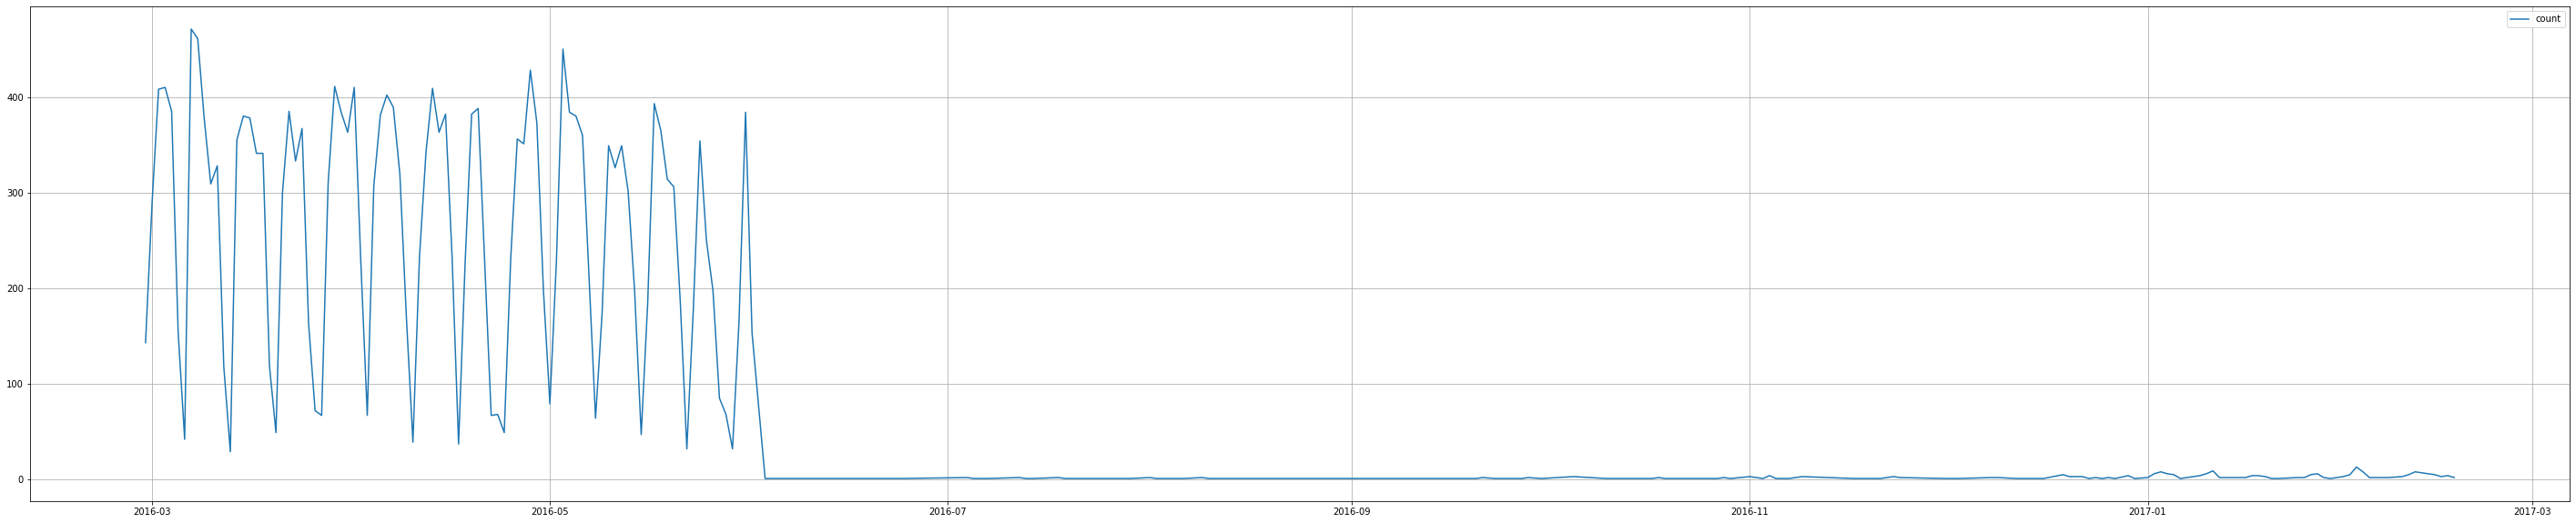

In [57]:
day = data['sys_created_at'].dt.day
month = data['sys_created_at'].dt.month
year = data['sys_created_at'].dt.year
CA_time_data = pd.DataFrame({'Day':day,'Month':month,'Year':year}).drop_duplicates().reset_index().drop('index',axis = 1)
count_list = []
for i in range(CA_time_data.shape[0]):
    count = data[(data['sys_created_at'].dt.day == CA_time_data.iloc[i]['Day'])
     & (data['sys_created_at'].dt.month == CA_time_data.iloc[i]['Month']) 
     & (data['sys_created_at'].dt.year == CA_time_data.iloc[i]['Year'])].drop_duplicates('number').shape[0]
    count_list.append(count)
    
CA_time_data['Count'] = count_list

CA_DF = pd.DataFrame(count_list,index = data['sys_created_at'].dt.date.drop_duplicates().values,columns = ['count'])
CA_DF.sort_index(inplace = True)
CA_DF.plot(grid = True,figsize = (50,10))
plt.savefig('OA')
plt.show()

* **We can see that there is a sudden increase the number of incidents closing and then again, the trend is similar.**

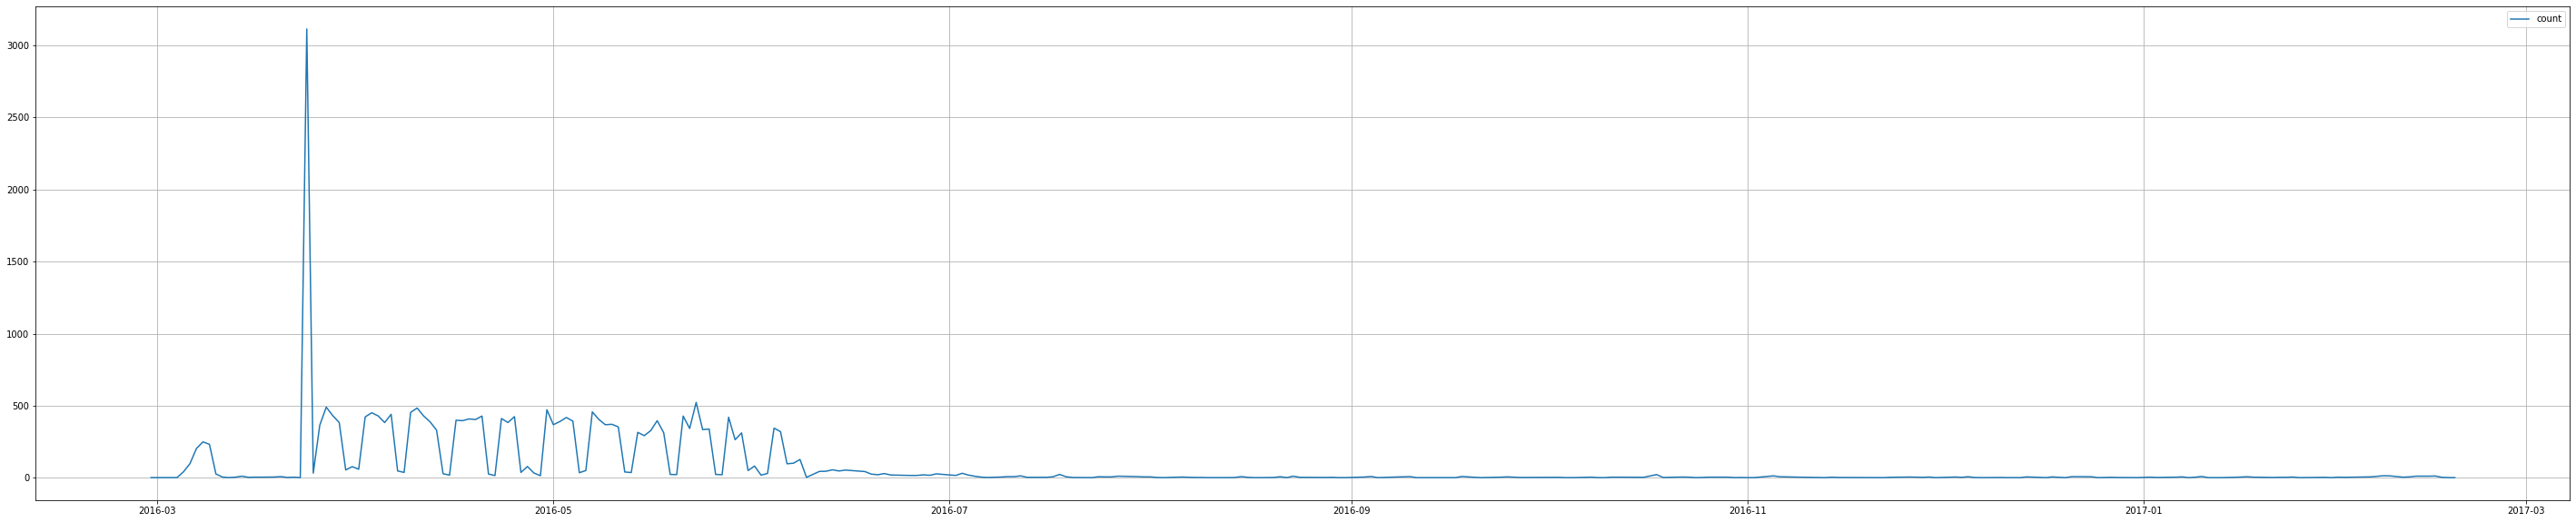

In [58]:
day = data['closed_at'].dt.day
month = data['closed_at'].dt.month
year = data['closed_at'].dt.year
CA_time_data = pd.DataFrame({'Day':day,'Month':month,'Year':year}).drop_duplicates().reset_index().drop('index',axis = 1)
count_list = []
for i in range(CA_time_data.shape[0]):
    count = data[(data['closed_at'].dt.day == CA_time_data.iloc[i]['Day'])
     & (data['closed_at'].dt.month == CA_time_data.iloc[i]['Month']) 
     & (data['closed_at'].dt.year == CA_time_data.iloc[i]['Year'])].drop_duplicates('number').shape[0]
    count_list.append(count)
    
CA_time_data['Count'] = count_list

CA_DF = pd.DataFrame(count_list,index = data['closed_at'].dt.date.drop_duplicates().values,columns = ['count'])
CA_DF.sort_index(inplace = True)
CA_DF.plot(grid = True,figsize = (50,10))
plt.savefig('CA')
plt.show()

* **As most of the incidents are being closed by code 6 , we have to look at what does closed code 6 means.**
* **We can also try and understand what do the other close code mean.**

* **made_sla is called as the service level agreement, in simpler terms it means whether the incident raised has been resolved in the given time or not, as we can see that most of the values are True which means that they have satisifed the customer with the solution, but also there are high False where the priority is moderate, which makes sense as it is easier to recognize the easily solvable incidents and the hard incidents, the point is to find out whether an incident raise in moderate, which might take some time, as we do not understand if it is easy or hard.**

# Important Featuress For The Machine Learning Problem:

* We have 34 features excluding the sys_created_at and the closed_at features, we will go with the regression problem here, we will try and find out how much time does it take for an incident to be finished once it gets created.
* Out of the 34 features we have we will discard some features such as caller_id,rfc,vendor,caused_by,problem_id,cmdb_ci we are removing these features as more than 95% of the data is NULL and we will also remove impact,urgency,active we dont need active as a feature as we already have incident_state as one of the feature which can be used instead of the active feature and also it has more information than the active feature, and we are removing the impact and urgency feature as we have a feature called priority which is made using these two features, so these features will be REDUNDANT.
* So of the remaining , the features which we can use for the machine learning model are:
    * Incident_state : Because we need to understand at which part is the ticket right now, it can be new so the time will be different when we compare it with a different incident_state.
    * We need all the integer variables which are reassignment_count, reopen_count,sys_mod_count which represent how many times the incident was reassigned , reopened and the number of times the analyst has been changed for the given incidnet.
    * We need the made_sla feature, as it is quite important to understand if the service level agreement is intact or breached.
    * We need all the information about who opened an incident, who is updating the incident and also who is closing the incident, so we will take the opened_by, created_by and updated_by features.
    * We also need the location, category and the sub-category as the service might be different in different locations and the service quality might be different in different categories and sub_categories.
    * We need the priority of the incident as it helps us understand , how fast or how slow can we resolve an incident.
    * We also need the assignment_group and the the person this incident has been assigned_to as the service might change person to person.
    * We also require the knowledge as a feature which makes us understand the complexity of the incident,if the incident is too complex then we need more knowledge about how to resolve the issue.
    * We need the resolved_by feature, just to know how good a service person can resolve the issue.
    * We are not looking at the closed_code feature, as it is a futuristic feature, which only comes after the incident has been closed.
    * We are also not considering the assignment_group, assigned_to,opened_by,created_by and updated_by features, as they are more like identifier's for the person who was involved in resolving the issue.
    * **So, at last the features which we will be using for the machine learning problem are:**
        * Incident_state
        * reassignment_count
        * reopen_count
        * sys_mod_count
        * made_sla
        * location
        * category
        * sub_category
        * Priority
        * knowledge
        * Time difference between the opened_at and resolved_at (which will be our dependent variable)

In [70]:
final_df = data[['incident_state','reassignment_count','reopen_count','sys_mod_count','priority','made_sla','location','category','subcategory','opened_at','closed_at']]

* **We are taking the time differenc between the opened_at and closed_at features, keeping the time delta in terms of hours and changing it, in terms of days. We will be using this as our dependent feature.**

In [115]:
no_days = final_df['closed_at'] - final_df['opened_at']
time_taken_to_resolve = np.ceil(no_days.astype('timedelta64[h]')/24)
final_df['TIME'] = time_taken_to_resolve
final_df.drop(['opened_at','closed_at'],axis = 1,inplace = True)

In [116]:
final_df.head()

,incident_state,reassignment_count,reopen_count,sys_mod_count,priority,made_sla,location,category,subcategory,TIME
0,New,0,0,0,Moderate,True,143,55,170,6.0
1,Resolved,0,0,2,Moderate,True,143,55,170,6.0
2,Resolved,0,0,3,Moderate,True,143,55,170,6.0
3,Closed,0,0,4,Moderate,True,143,55,170,6.0
4,New,0,0,0,Moderate,True,165,40,215,7.0


* **As it could be obvious that the number of active cases would be more when compared to the closed or resolved cases.**

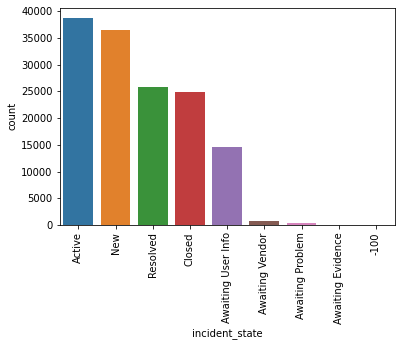

In [85]:
sns.countplot(final_df['incident_state'],order = final_df['incident_state'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

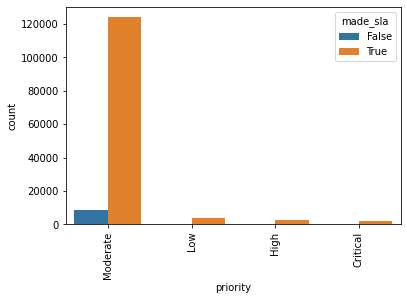

In [92]:
sns.countplot(x = 'priority',data = final_df,hue = 'made_sla',order = final_df['priority'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [129]:
pd.crosstab(data['made_sla'],data['priority'],normalize = 'columns')

priority,Critical,High,Low,Moderate
made_sla,,,,
False,0.11736,0.136608,0.031017,0.063563
True,0.88264,0.863392,0.968983,0.936437


* **If we look at the correlation plot between the numerical features in the data set including the dependent variable, we see a good co relation between the sys_mod_count and time and a little corelation between the time and the reassignment_count features, which means these are definitely important during our machine learning process.**

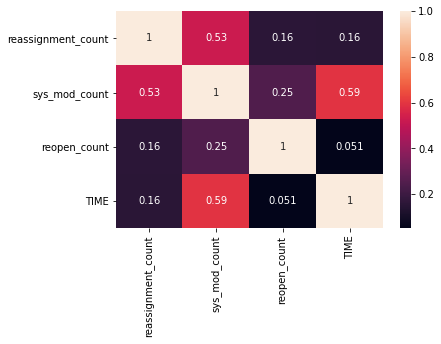

In [120]:
sns.heatmap(final_df[['reassignment_count','sys_mod_count','reopen_count','TIME']].corr(),annot = True)
plt.show()

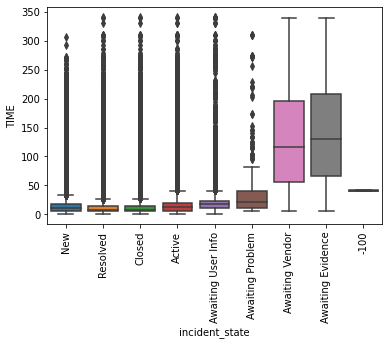

In [122]:
sns.boxplot(x = 'incident_state', y = 'TIME',data = final_df)
plt.xticks(rotation = 90)
plt.show()

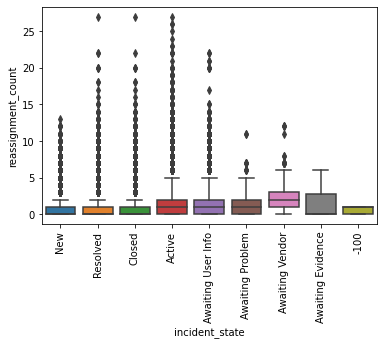

In [123]:
sns.boxplot(x = 'incident_state', y = 'reassignment_count',data = final_df)
plt.xticks(rotation = 90)
plt.show()

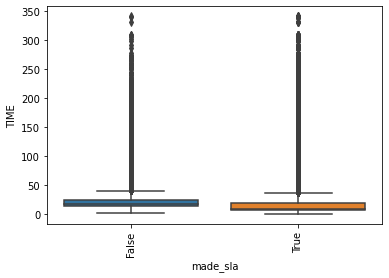

In [125]:
sns.boxplot(x = 'made_sla', y = 'TIME',data = final_df)
plt.xticks(rotation = 90)
plt.show()

* **Looking at all the different box plots we were able to plot, it is obvious that there are alot of extreme values in every feature, and we actually cant ignore or remove these extreme values as there are the cases/incidents which we need to look at more and find out the insights as to why did these incidents take more time or something like that.**

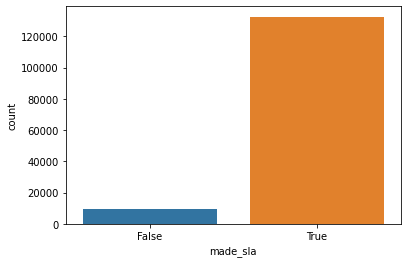

In [127]:
sns.countplot(final_df['made_sla'])
plt.show()